In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [29]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.20)



train_generator=train_datagen.flow_from_directory('C:/Users/Uday/Downloads/Compressed/Sign-Language-Digits-Dataset-master/Dataset',
                                                 target_size=(100,100),
                                                 color_mode='rgb',
                                                 batch_size=1587,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')

valid_generator=train_datagen.flow_from_directory('C:/Users/Uday/Downloads/Compressed/Sign-Language-Digits-Dataset-master/Dataset',
                                                 target_size=(100,100),
                                                 color_mode='rgb',
                                                 batch_size=393,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 1587 images belonging to 10 classes.
Found 393 images belonging to 10 classes.


label  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


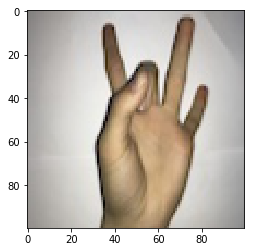

label  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


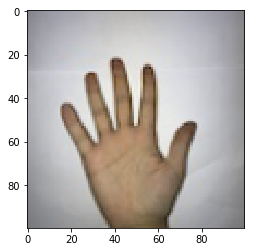

label  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


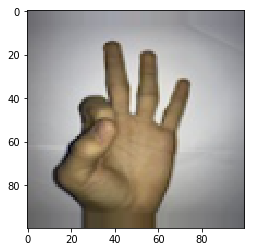

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


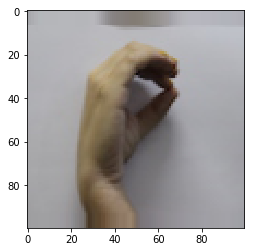

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


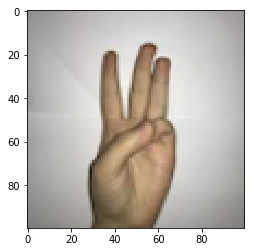

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


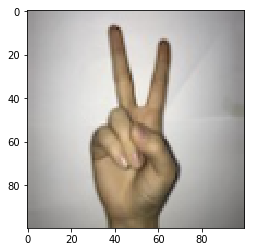

In [30]:
train_X,train_Y = train_generator.next()
for i in range(0,3):
    print('label ',train_Y[i])
    plt.imshow(train_X[i])
    plt.show()
    
valid_X,valid_Y = valid_generator.next()
for i in range(0,3):
    print(valid_Y[i])
    plt.imshow(valid_X[i])
    plt.show()


In [31]:
train_X=train_X.reshape(-1,100,100,3)
print(train_X.shape,train_Y.shape)
train_X = train_X.astype('float32')

(1587, 100, 100, 3) (1587, 10)


In [32]:
np.shape(train_X[0])

(100, 100, 3)

In [59]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [60]:
batch_size=32
epochs=20
num_classes=10

In [14]:
sign_model=Sequential()
sign_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))
sign_model.add(LeakyReLU(alpha=0.1))
sign_model.add(MaxPooling2D((2,2),padding='same'))
sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
sign_model.add(LeakyReLU(alpha=0.1))
sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sign_model.add(Flatten())
sign_model.add(Dense(64,activation='linear'))
sign_model.add(LeakyReLU(alpha=0.1))
sign_model.add(Dense(num_classes,activation='softmax'))

In [15]:
sign_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
sign_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
__________

In [16]:
sign_train = sign_model.fit(train_X,train_Y,batch_size=batch_size,epochs=epochs,verbose=1,validation_data = (valid_X,valid_Y))

Train on 1587 samples, validate on 393 samples
Epoch 1/20
1587/1587 [==============================] - 29s 18ms/step - loss: 2.3943 - acc: 0.2363 - val_loss: 1.9293 - val_acc: 0.2672
Epoch 2/20
1587/1587 [==============================] - 26s 16ms/step - loss: 1.2957 - acc: 0.5545 - val_loss: 1.9323 - val_acc: 0.3791
Epoch 3/20
1587/1587 [==============================] - 26s 16ms/step - loss: 0.7786 - acc: 0.7473 - val_loss: 1.9838 - val_acc: 0.4377
Epoch 4/20
1587/1587 [==============================] - 26s 17ms/step - loss: 0.4930 - acc: 0.8563 - val_loss: 2.1644 - val_acc: 0.4580
Epoch 5/20
1587/1587 [==============================] - 26s 16ms/step - loss: 0.3212 - acc: 0.9023 - val_loss: 2.1364 - val_acc: 0.5064
Epoch 6/20
1587/1587 [==============================] - 26s 16ms/step - loss: 0.1988 - acc: 0.9471 - val_loss: 2.7431 - val_acc: 0.5089
Epoch 7/20
1587/1587 [==============================] - 26s 16ms/step - loss: 0.0900 - acc: 0.9811 - val_loss: 2.6266 - val_acc: 0.5191
E

<Figure size 432x288 with 0 Axes>

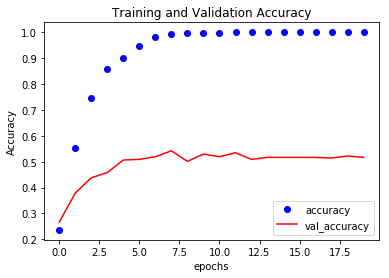

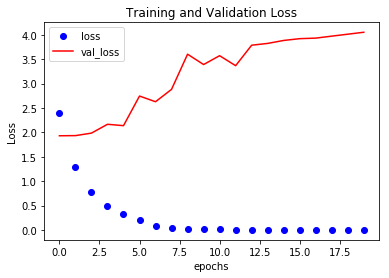

<Figure size 432x288 with 0 Axes>

In [19]:
accuracy  = sign_train.history['acc']
val_accuracy = sign_train.history['val_acc']
loss = sign_train.history['loss']
val_loss = sign_train.history['val_loss']
epochs = np.arange(len(accuracy))
plt.plot(epochs,accuracy,'bo',color='blue',label='accuracy')
plt.plot(epochs,val_accuracy,'b',color='red',label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.figure()
plt.plot(epochs,loss,'bo',color='blue',label='loss')
plt.plot(epochs,val_loss,'b',color='red',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

In [23]:
batch_size=32
epochs=20
num_classes=10

In [61]:
sign_model_do=Sequential()
sign_model_do.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3)))
sign_model_do.add(LeakyReLU(alpha=0.1))
sign_model_do.add(MaxPooling2D((2,2),padding='same'))
sign_model_do.add(Dropout(0.50))
sign_model_do.add(Conv2D(64,kernel_size=(3,3),activation='linear'))
sign_model_do.add(LeakyReLU(alpha=0.1))
sign_model_do.add(MaxPooling2D((2,2),padding='same'))
sign_model_do.add(Dropout(0.50))
sign_model_do.add(Conv2D(128,kernel_size=(3,3),activation='linear'))
sign_model_do.add(LeakyReLU(alpha=0.1))
sign_model_do.add(MaxPooling2D((2,2),padding='same'))
sign_model_do.add(Dropout(0.50))
sign_model_do.add(Conv2D(256,kernel_size=(3,3),activation='linear'))
sign_model_do.add(LeakyReLU(alpha=0.1))
sign_model_do.add(MaxPooling2D((2,2),padding='same'))
sign_model_do.add(Dropout(0.50))
sign_model_do.add(Flatten())
sign_model_do.add(Dense(256, activation='linear'))
sign_model_do.add(LeakyReLU(alpha=0.1))           
sign_model_do.add(Dropout(0.65))
sign_model_do.add(Dense(num_classes,activation='softmax'))

In [62]:
sign_model_do.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [63]:
sign_model_do.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [51]:
sign_train_do = sign_model_do.fit(train_X,train_Y,batch_size=batch_size,epochs=20,verbose=1,validation_data = (valid_X,valid_Y))

Train on 1587 samples, validate on 393 samples
Epoch 1/20
1587/1587 [==============================] - 35s 22ms/step - loss: 2.3993 - acc: 0.1059 - val_loss: 2.3023 - val_acc: 0.1069
Epoch 2/20
1587/1587 [==============================] - 34s 21ms/step - loss: 2.3034 - acc: 0.1052 - val_loss: 2.3025 - val_acc: 0.1094
Epoch 3/20
1587/1587 [==============================] - 34s 21ms/step - loss: 2.3027 - acc: 0.1059 - val_loss: 2.3006 - val_acc: 0.0967
Epoch 4/20
1587/1587 [==============================] - 34s 22ms/step - loss: 2.2833 - acc: 0.1336 - val_loss: 2.2613 - val_acc: 0.2214
Epoch 5/20
1587/1587 [==============================] - 35s 22ms/step - loss: 2.0366 - acc: 0.2628 - val_loss: 1.8174 - val_acc: 0.3715
Epoch 6/20
1587/1587 [==============================] - 35s 22ms/step - loss: 1.5758 - acc: 0.4480 - val_loss: 1.5047 - val_acc: 0.5547
Epoch 7/20
1587/1587 [==============================] - 39s 24ms/step - loss: 1.2361 - acc: 0.5892 - val_loss: 1.2379 - val_acc: 0.5878
E

In [207]:
sign_model_do.save("sign_model_dropout.h5py")

<Figure size 432x288 with 0 Axes>

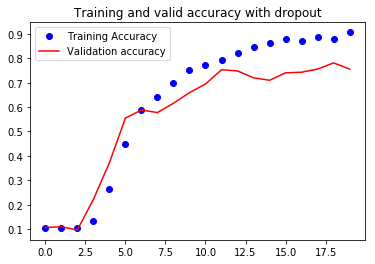

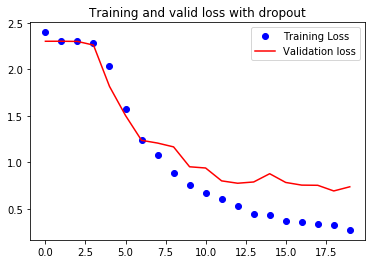

<Figure size 432x288 with 0 Axes>

In [55]:
accuracy = sign_train_do.history['acc']
val_acc = sign_train_do.history['val_acc']
loss = sign_train_do.history['loss']
val_loss = sign_train_do.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'o',label='Training Accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation accuracy',color='red')
plt.title('Training and valid accuracy with dropout')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'o',label='Training Loss',color='blue')
plt.plot(epochs,val_loss,label='Validation loss',color='red')
plt.title('Training and valid loss with dropout')
plt.legend()
plt.figure()

In [35]:
aug_image_gen = ImageDataGenerator(rotation_range=90,validation_split=0.10,zoom_range=0.2)

In [36]:
aug_image_gen.fit(train_X)

In [37]:

aug_train_generator=aug_image_gen.flow(train_X,train_Y,
                                                 batch_size=1428,
                                                 shuffle=True,
                                                 subset='training')
aug_valid_generator=aug_image_gen.flow(train_X,train_Y,
                                                 batch_size=158,
                                                 shuffle=True,
                                                 subset='validation')

In [130]:
train_aug_X,train_aug_Y = aug_train_generator.next()
valid_aug_X,valid_aug_Y = aug_valid_generator.next()

In [39]:
np.shape(train_aug_Y)

(1428, 10)

In [56]:
from keras.models import load_model
full_model = load_model('sign_model_dropout.h5py')

label  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


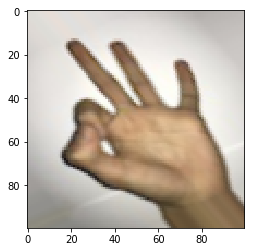

label  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


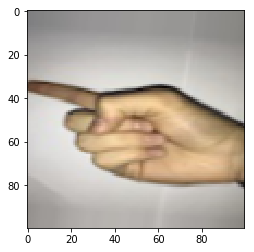

label  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


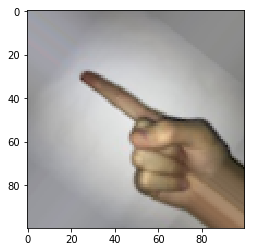

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


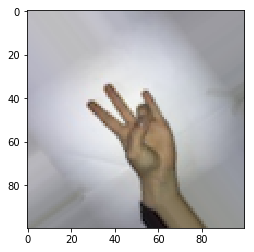

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


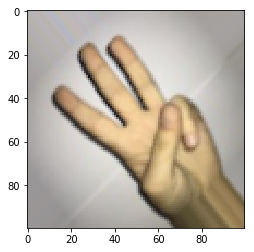

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


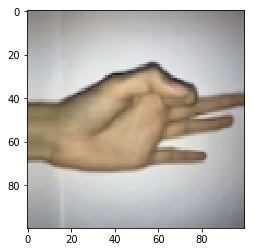

In [40]:
for i in range(0,3):
    print('label ',train_aug_Y[i])
    plt.imshow(train_aug_X[i])
    plt.show()
    
valid_X,valid_Y = valid_generator.next()
for i in range(0,3):
    print(valid_aug_Y[i])
    plt.imshow(valid_aug_X[i])
    plt.show()

In [51]:
train_full_X = np.concatenate((train_X,train_aug_X),axis=0)
train_full_Y = np.concatenate((train_Y,train_aug_Y),axis=0)

In [55]:
valid_full_X = np.concatenate((valid_X,valid_aug_X),axis=0)
valid_full_Y = np.concatenate((valid_Y,valid_aug_Y),axis=0)

In [52]:
np.shape(train_full_Y)

(3015, 10)

label  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


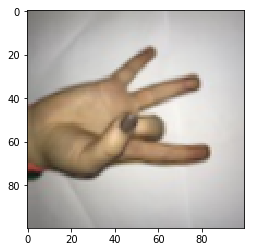

label  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


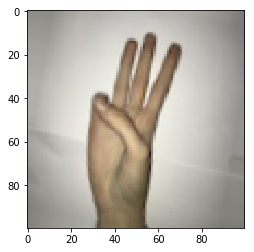

label  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


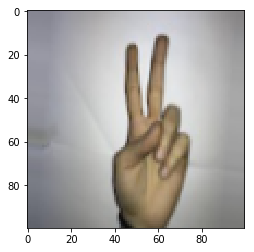

In [53]:
for i in range(3011,3014):
    print('label ',train_full_Y[i])
    plt.imshow(train_full_X[i])
    plt.show()

In [66]:
sign_full_model_train = sign_model_do.fit(train_full_X,train_full_Y,batch_size=batch_size,epochs=25,verbose=1,validation_data = (valid_aug_X,valid_aug_Y))

Train on 3015 samples, validate on 158 samples
Epoch 1/25
3015/3015 [==============================] - 58s 19ms/step - loss: 2.3032 - acc: 0.1091 - val_loss: 2.3058 - val_acc: 0.1013
Epoch 2/25
3015/3015 [==============================] - 58s 19ms/step - loss: 2.2984 - acc: 0.1068 - val_loss: 2.2872 - val_acc: 0.1203
Epoch 3/25
3015/3015 [==============================] - 59s 19ms/step - loss: 2.1552 - acc: 0.2103 - val_loss: 2.1133 - val_acc: 0.2848
Epoch 4/25
3015/3015 [==============================] - 59s 19ms/step - loss: 1.8295 - acc: 0.3526 - val_loss: 1.8441 - val_acc: 0.3671
Epoch 5/25
3015/3015 [==============================] - 59s 19ms/step - loss: 1.4825 - acc: 0.4803 - val_loss: 1.5105 - val_acc: 0.4873
Epoch 6/25
3015/3015 [==============================] - 58s 19ms/step - loss: 1.1974 - acc: 0.5814 - val_loss: 1.6029 - val_acc: 0.4620
Epoch 7/25
3015/3015 [==============================] - 58s 19ms/step - loss: 1.0758 - acc: 0.6226 - val_loss: 1.1807 - val_acc: 0.6139
E

<Figure size 432x288 with 0 Axes>

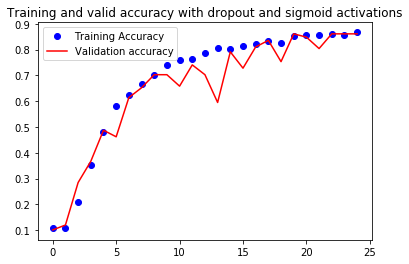

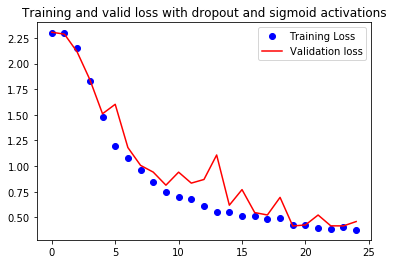

<Figure size 432x288 with 0 Axes>

In [67]:
accuracy = sign_full_model_train.history['acc']
val_acc = sign_full_model_train.history['val_acc']
loss = sign_full_model_train.history['loss']
val_loss = sign_full_model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'o',label='Training Accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation accuracy',color='red')
plt.title('Training and valid accuracy with dropout and sigmoid activations')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'o',label='Training Loss',color='blue')
plt.plot(epochs,val_loss,label='Validation loss',color='red')
plt.title('Training and valid loss with dropout and sigmoid activations')
plt.legend()
plt.figure()

In [211]:
from sklearn.utils import shuffle
test_X,test_Y = shuffle(valid_X,valid_Y)

In [212]:
sign_test_eval = sign_model_do.evaluate(test_X,test_Y)

393/393 [==============================] - 2s 5ms/step


In [213]:
print('Loss:',sign_test_eval[0])
print('Accuracy:',sign_test_eval[1])

Loss: 0.691730020458765
Accuracy: 0.8091603054951773


In [214]:
predicted_classes = sign_model_do.predict_proba(test_X)
predicted_classes = np.argmax((predicted_classes),axis=1)
real_classes = np.argmax((test_Y),axis=1)
predicted_classes = predicted_classes.reshape(393,1)
real_classes = real_classes.reshape(393,1)

Found correct labels 318


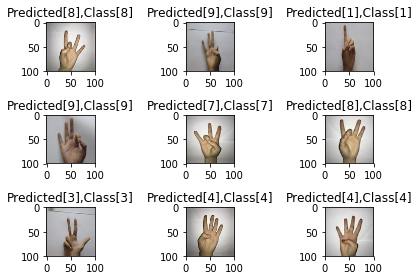

In [215]:
correct = np.where(predicted_classes==real_classes)[0]
print('Found correct labels',len(correct))
#print(correct)
for i,correct in enumerate(correct[40:49]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(100,100,3),interpolation='None')
    plt.title("Predicted{},Class{}".format(predicted_classes[correct],real_classes[correct]))
    plt.tight_layout()

Found correct labels 75
[  1   2   4   5  17  22  24  26  31  49  62  63  69  70  81  87  88  93
 106 110 122 123 134 135 136 140 142 144 150 151 155 162 165 189 197 198
 205 218 222 232 234 238 249 258 259 267 271 280 281 283 286 288 290 293
 294 297 309 310 312 314 316 318 324 325 328 332 343 344 351 352 354 361
 376 378 388]


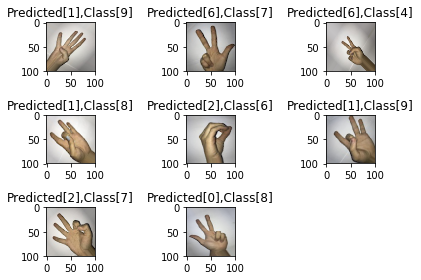

In [216]:
incorrect = np.where(predicted_classes!=real_classes)[0]
print('Found correct labels',len(incorrect))
print(incorrect)
for i,incorrect in enumerate(incorrect[20:28]):
    plt.subplot(3,3,i+1)
    plt.imshow(valid_aug_X[incorrect].reshape(100,100,3),interpolation='None')
    plt.title("Predicted{},Class{}".format(predicted_classes[incorrect],real_classes[incorrect]))
    plt.tight_layout()

In [217]:
from sklearn.metrics import classification_report
target_names = ['Class{}'.format(i) for i in range(num_classes)]
print(classification_report(real_classes, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

      Class0       0.95      0.97      0.96        40
      Class1       0.64      1.00      0.78        38
      Class2       0.62      0.93      0.74        40
      Class3       0.92      0.90      0.91        40
      Class4       0.90      0.65      0.75        40
      Class5       0.97      0.95      0.96        39
      Class6       0.71      0.77      0.74        39
      Class7       0.86      0.62      0.72        39
      Class8       0.95      0.50      0.66        40
      Class9       0.86      0.82      0.84        38

   micro avg       0.81      0.81      0.81       393
   macro avg       0.84      0.81      0.81       393
weighted avg       0.84      0.81      0.81       393



Found correct labels 40


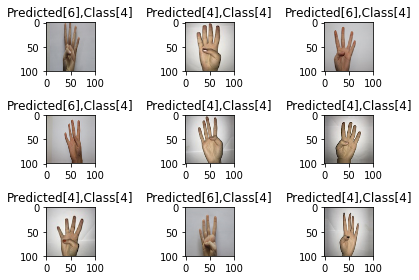

In [218]:
correct = np.where(real_classes==4)[0]
print('Found correct labels',len(correct))
for i,correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(100,100,3),interpolation='None')
    plt.title("Predicted{},Class{}".format(predicted_classes[correct],real_classes[correct]))
    plt.tight_layout()